In [19]:
r = a[3047]
print r[5]
print re.split('[0-9]',r[5])
print [i for i in re.split('[0-9]',r[5]) if len(i) > 0]

zip(re.split('[A-Z]',r[5]),[i for i in re.split('[0-9]',r[5]) if len(i) > 0])

58M181N42M
['', '', 'M', '', '', 'N', '', 'M']
['M', 'N', 'M']


[('58', 'M'), ('181', 'N'), ('42', 'M')]

In [21]:
#read sam
#find split
#get 5' of sj
#get 3' of sj

#NOTES
#Soft Clip wont change POS

import re
from tqdm import *
def get_n_len(cigar):
    ''' '''
    n = re.findall('[0-9]*N',cigar)
    n = [int(i.replace('N','')) for i in n]
    return n
def get_low_comp(seq):
    ''' '''
    thresh = len(seq)/2
    
    for i in 'ATCG':
        for j in 'ATCG':
            if seq.count(''.join([i,j]))*2 > thresh:
               # print 'Too many {}'.format(''.join([i,j]))
                return True
    return False

print get_low_comp('ACTCTGTGTGTGTGTGTGTGAGAGAGAGAGAGAGAGTGAATGAGAGGGAAC')

a = [i.strip().split('\t') for i in open('E-MTAB-4052/ERR1138638Aligned.out.sam').readlines() if i[0] != '@']
a = [i for i in a if (len(re.findall('[0-9]*N',i[5]))) > 0] #get split
a = [i for i in a if any(n > 2 for n in get_n_len(i[5]))] #split is less likely to be error
print len(a)
b = [i for i in a if get_low_comp(i[9]) == True]
a = [i for i in a if get_low_comp(i[9]) == False]
print len(a)
#a gets readsa withsplit 

class Split:
    
    def __init__(self, sam_line):
        ''' '''
        self.cigar = sam_line[5]
        self.map_start = int(sam_line[3])
        self.seq = sam_line[9]
        
        cig_lengths = [int(i) for i in re.split('[A-Z]',self.cigar) if len(i) > 0]
        cig_sects = [i for i in re.split('[0-9]',self.cigar) if len(i) > 0]
        self.cig_seq = zip(cig_lengths,cig_sects)
        
    def rm_sclip(self):
        ''' '''
        pass
    
    def get_5(self):
        ''' '''
        maps = []
        offset = 0
        for i in self.cig_seq:
            if i[1] == 'S':
                pass
            if i[1] == 'M':
                maps.append((self.map_start+offset,self.map_start+offset+i[0]))
            else:
                offset += i[0]
        return tuple(maps[0])
    
    def get_3(self):
        ''' '''
        maps = []
        offset = 0
        for i in self.cig_seq:
            if i[1] == 'S':
                pass
            if i[1] == 'M':
                maps.append((self.map_start+offset,self.map_start+offset+i[0]))
            else:
                offset += i[0]
        return tuple(maps[-1])
                
        
splice_sites5 = []
splice_sites3 = []
for i in tqdm_notebook(a):
    tc = Split(i)
    maps5 = tc.get_5()
    splice_sites5.append(maps5[1])
    maps3 = tc.get_3()
    splice_sites3.append(maps3[0])
    
 

False
8792
8766



107
463
[1461, 1463, 1464, 1465]
[1107, 1133, 1186, 1199]
[1515, 1899, 2694, 3455, 3737, 3983]
[1461, 1461, 1461, 1463, 1463, 1463, 1463, 1463, 1463, 1464, 1464, 1464, 1464, 1464, 1464, 1465, 1465, 1465, 1465, 1465, 1465, 1466, 1466, 1466, 1467, 1467, 1467, 1467, 1467, 1468, 1468, 1468, 1468, 1468, 1468, 1468, 1469, 1469, 1470, 1470, 1470, 1470, 1470, 1471, 1471, 1472, 1472, 1472, 1473, 1474, 1474, 1474, 1474, 1474, 1474, 1474, 1474, 1474, 1474, 1475, 1476, 1476, 1476, 1476, 1476, 1476, 1476, 1476, 1476, 1476, 1476, 1476, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1477, 1478, 1478, 1478, 1478, 1478, 1478, 1478, 1478, 1478, 1478, 1478, 1478, 1478, 1479, 1479, 1479, 1479, 1479, 1479, 1479, 1481, 1481, 1481, 1481, 1481, 1481, 1481, 1481, 1481, 1482, 1482, 1482, 1483, 1483, 1484, 1484, 1484, 1484, 1484, 1484, 1484, 1485, 1485, 1485

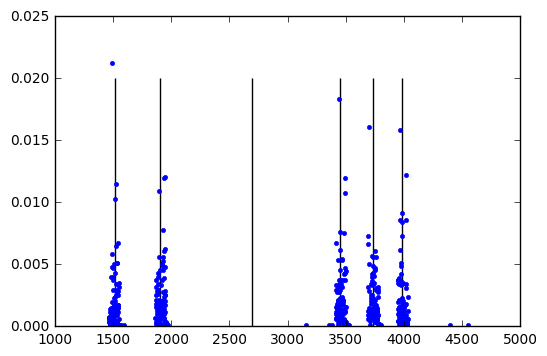

In [22]:
%matplotlib inline

import matplotlib.pylab as pl

splice_sitess5 = sorted(set(splice_sites5))
print len(splice_sitess5)
splice_sitcount5 = []
for i in splice_sitess5:
    splice_sitcount5.append(splice_sites5.count(i)/float(len(splice_sites5)))

splice_sitess3 = sorted(set(splice_sites3))
print len(splice_sitess3)
splice_sitcount3 = []
for i in splice_sitess3:
    splice_sitcount3.append(splice_sites3.count(i)/float(len(splice_sites3)))
    
    
print splice_sitess3[:4]
print splice_sitess5[:4]

splice_peaks3 = []
splice_dict_3 = {i[0]:i[1] for i in zip(splice_sites3,splice_sitcount3)}
for i in range(max(splice_sites3)):
    try:
        splice_peaks3.append(splice_dict_3[i])
    except:
        splice_peaks3.append(0)

#print splice_peaks3

import numpy as np
from scipy.signal import find_peaks_cwt
cb = np.array(splice_peaks3)
indexes = find_peaks_cwt(cb, np.arange(1, 550))
print indexes
#pl.plot(splice_sitess5,splice_sitcount5,'.')
print sorted(splice_sites3)
for i in indexes:
    pl.vlines(i, 0,0.02)
pl.plot(splice_sitess3,splice_sitcount3,'.')

In [23]:
splice_sites3

[3419,
 3451,
 3977,
 3434,
 3449,
 3695,
 3697,
 3773,
 3974,
 1869,
 1941,
 3729,
 3742,
 3963,
 4020,
 3453,
 3735,
 1514,
 1865,
 1940,
 1520,
 1865,
 3721,
 3963,
 4020,
 3988,
 4020,
 1477,
 3961,
 4000,
 3487,
 1896,
 1942,
 3703,
 3758,
 1870,
 3963,
 3759,
 3496,
 3696,
 3973,
 3987,
 3497,
 3724,
 1937,
 3699,
 3498,
 3716,
 3768,
 3453,
 3463,
 1928,
 3774,
 3779,
 1507,
 1927,
 1922,
 1949,
 1512,
 3734,
 3778,
 3736,
 3715,
 3724,
 3751,
 1493,
 1914,
 1906,
 3449,
 4023,
 3435,
 3468,
 3695,
 3760,
 3456,
 3478,
 3996,
 4021,
 3697,
 3724,
 3716,
 1882,
 1943,
 4021,
 1867,
 1941,
 1940,
 1894,
 1948,
 1928,
 1506,
 3460,
 3472,
 3987,
 1950,
 3721,
 3744,
 3734,
 3963,
 3984,
 1536,
 3447,
 3474,
 3982,
 4020,
 1512,
 1525,
 1943,
 3468,
 1522,
 1542,
 3455,
 3738,
 1869,
 1922,
 3975,
 1488,
 3429,
 3450,
 1510,
 3754,
 3774,
 1888,
 1948,
 3493,
 3987,
 1865,
 3758,
 3963,
 4002,
 1501,
 3712,
 1500,
 3742,
 1533,
 1496,
 1875,
 1942,
 1922,
 3443,
 1495,
 3759,
 4018,